Cohort represents a group of population or area of study which shares a common feature over a period of time
Example: a group of customer purchased a subscription for a given period of time over app
When we talked about business problems, customers or users are represented as a cohort
Features:
It helps to understand how the behaviour of users can affect the business in terms of acquisition and retention
It helps to analyze the customer churn rate
It also helps in calculating the lifetime value of a customer
It helps in finding the points where we need to increase more engagement with the customer.

In [1]:
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
##MachineLearning Algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df=pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Data Cleaning Operations

In [3]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
df= df.dropna(subset=['CustomerID'])  

In [5]:
df.duplicated().sum()

5225

In [6]:
df=df.drop_duplicates()


In [7]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,401604.000000,401604,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064,15281.160818
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,250.283037,NaN,69.764035,1714.006089


In [8]:
df=df[(df['Quantity']>0) & (df['UnitPrice']>0)] ##We noted that unitpirce have min value 0 and quantity have min price negative
##We specify a condition that Quantity should be greater than 0 and unit price must be 0

In [9]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,392692.000000,392692,392692.000000,392692.000000
mean,13.119702,2011-07-10 19:13:07.771892480,3.125914,15287.843865
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,180.492832,NaN,22.241836,1713.539549


Data Preparation operation

In [10]:
def get_month(x): 
    return dt.datetime(x.year,x.month,1) 
#this function takes a datetime object x and return a new datetime object representing
#first day of same month and year
df['InvoiceMonth']=df['InvoiceDate'].apply(get_month)


In [11]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01


In [12]:
grouping = df.groupby('CustomerID')['InvoiceMonth']

In [13]:
df['CohortMonth']=grouping.transform('min')

In [14]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01


In [15]:
##This function extract year,month,day from datetime colum in a dataframe
def get_month_int(dframe,column):
    year=dframe[column].dt.year
    month=dframe[column].dt.month
    day=dframe[column].dt.day
    return year,month,day

invoice_year,invoice_month,_=get_month_int(df,"InvoiceMonth")
cohort_year,cohort_month,_=get_month_int(df,'CohortMonth')

In [16]:
year_diff=invoice_year-cohort_year
month_diff=invoice_month-cohort_month

In [17]:
df['CohortIndex']=year_diff*12+ month_diff+1 ##Calculate cohort index

In [22]:
##Count Monthly active customers from each cohort
grouping=df.groupby(['CohortMonth','CohortIndex'])
cohort_data= grouping['CustomerID'].apply(pd.Series.nunique)



CohortMonth  CohortIndex
2010-12-01   1              885
             2              324
             3              286
             4              340
             5              321
                           ... 
2011-10-01   2               86
             3               41
2011-11-01   1              323
             2               36
2011-12-01   1               41
Name: CustomerID, Length: 91, dtype: int64


In [21]:
##Return the number of unique elements in the object
cohort_data=cohort_data.reset_index()
cohort_counts=cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID')


CohortIndex     1      2      3      4      5      6      7      8      9   \
CohortMonth                                                                  
2010-12-01   885.0  324.0  286.0  340.0  321.0  352.0  321.0  309.0  313.0   
2011-01-01   417.0   92.0  111.0   96.0  134.0  120.0  103.0  101.0  125.0   
2011-02-01   380.0   71.0   71.0  108.0  103.0   94.0   96.0  106.0   94.0   
2011-03-01   452.0   68.0  114.0   90.0  101.0   76.0  121.0  104.0  126.0   
2011-04-01   300.0   64.0   61.0   63.0   59.0   68.0   65.0   78.0   22.0   
2011-05-01   284.0   54.0   49.0   49.0   59.0   66.0   75.0   27.0    NaN   
2011-06-01   242.0   42.0   38.0   64.0   56.0   81.0   23.0    NaN    NaN   
2011-07-01   188.0   34.0   39.0   42.0   51.0   21.0    NaN    NaN    NaN   
2011-08-01   169.0   35.0   42.0   41.0   21.0    NaN    NaN    NaN    NaN   
2011-09-01   299.0   70.0   90.0   34.0    NaN    NaN    NaN    NaN    NaN   
2011-10-01   358.0   86.0   41.0    NaN    NaN    NaN    NaN    

In [23]:
##Retention Table
cohort_size=cohort_counts.iloc[:,0]
retention=cohort_counts.divide(cohort_size,axis=0)
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01-01,100.0,22.1,26.6,23.0,32.1,28.8,24.7,24.2,30.0,32.6,36.5,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


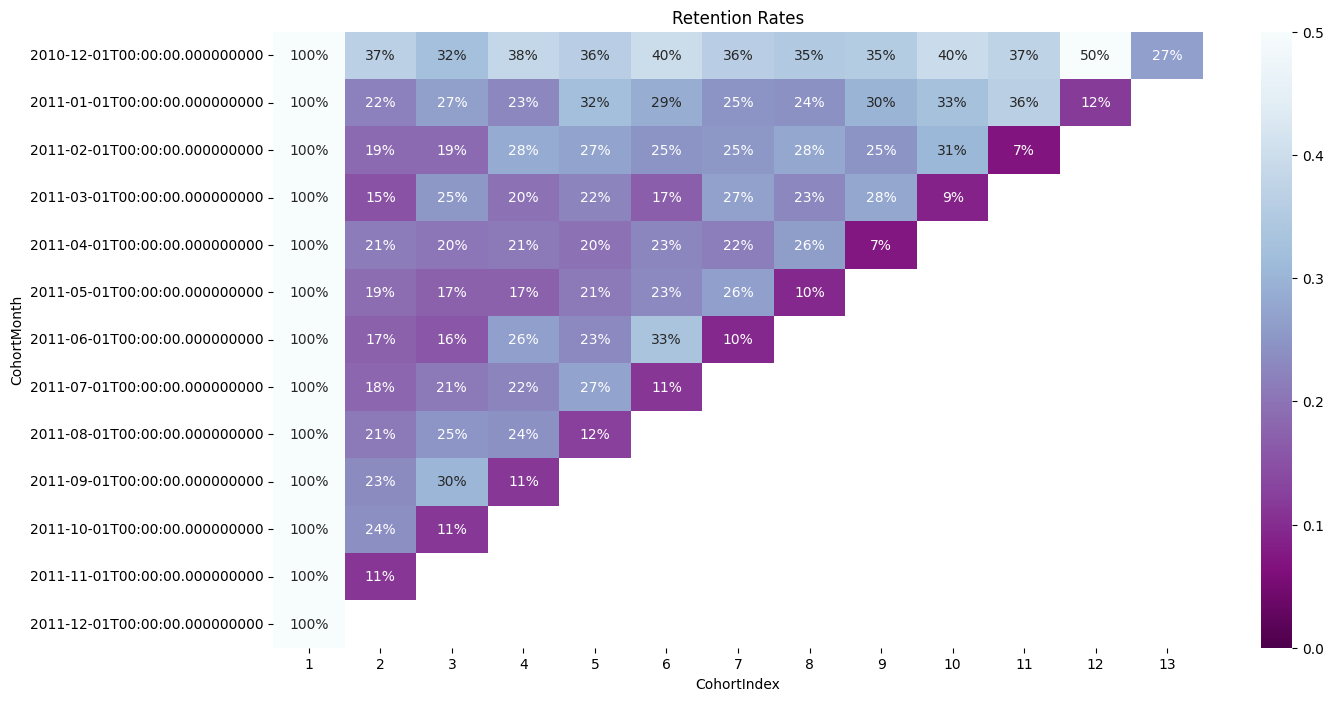

In [25]:
##Build the heatmap
plt.figure(figsize=(15,8))
plt.title('Retention Rates')
sns.heatmap(data=retention,annot=True,fmt='.0%',vmin=0.0,vmax=0.5,cmap="BuPu_r")
plt.show()
##Customer retention shows the active customer

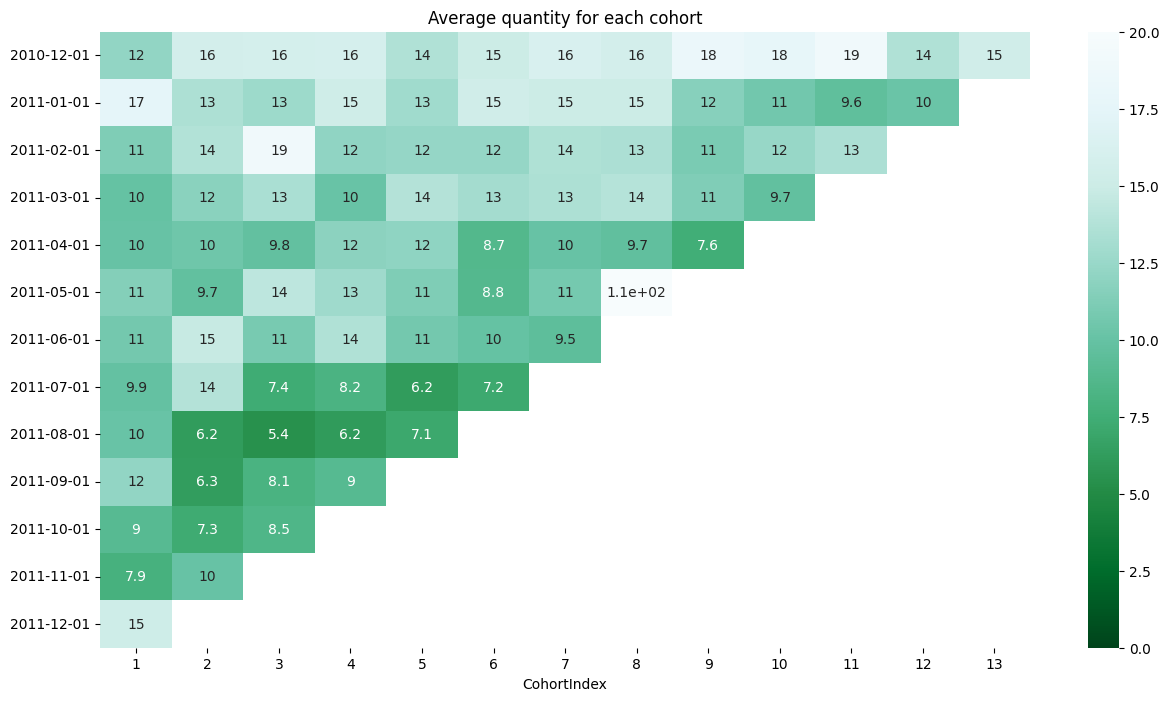

In [26]:
#Average quantity for each cohort
grouping=df.groupby(['CohortMonth','CohortIndex'])
cohort_data=grouping['Quantity'].mean()
cohort_data=cohort_data.reset_index()
average_quantity = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='Quantity')
average_quantity.round(1)
average_quantity.index = average_quantity.index.date

#Build the heatmap
plt.figure(figsize=(15, 8))
plt.title('Average quantity for each cohort')
sns.heatmap(data=average_quantity,annot = True,vmin = 0.0,vmax =20,cmap="BuGn_r")
plt.show()